In [29]:
import pandas as pd
from scipy import stats
import numpy as np

import seaborn as sns
from sklearn import datasets
from matplotlib import pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

### Первая часть

In [30]:
# загружаем датасет
data = datasets.load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

In [31]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

#### Посчитать руками статистики $\bar{X}, s^2, \mu, MODE, X_{0.75} - X_{0.25}$ для поля mean symmetry

In [33]:
x = df['mean symmetry']

In [48]:
# доделать моду и IQR

n = len(x)

mean = 1/n*sum(x)

s2 = 1/(n-1)*sum((x-mean)**2)

# расчет медианы - mu
ranks = sorted(x)
mu = ranks[n//2]

#расчет моды - mode
array = list(x)
result = {i: array.count(i) for i in array}
mode = sorted(result.items(), key = lambda result: result[1], reverse=True)[0][0]

# расчет интерквантильного размаха
IQR = np.percentile(x, 75) - np.percentile(x, 25)

print(f'mean: {mean:.6}, s2: {s2:.6}, mu: {mu:.6}, mode: {mode:.4}, IQR: {IQR:.4}')

mean: 0.181162, s2: 0.000751543, mu: 0.1792, mode: 0.1769, IQR: 0.0338


In [5]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


#### С помощью seaborn найти пару наиболее зависимых и независимых признаков среди первых 5

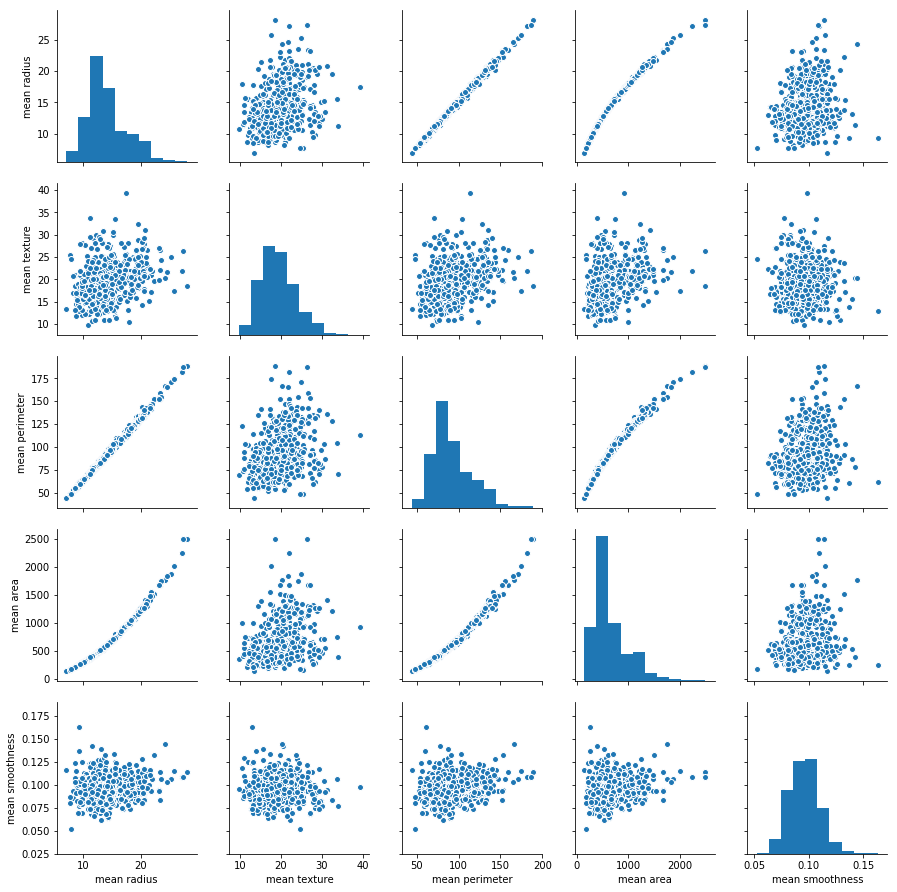

In [54]:
# mean radius и mean perimetor

df5 = df.iloc[:, 0:5]
sns.pairplot(df5)

#### С помощью матрицы корреляций найти пару наиболее зависимых и независимых признаков среди первых 5

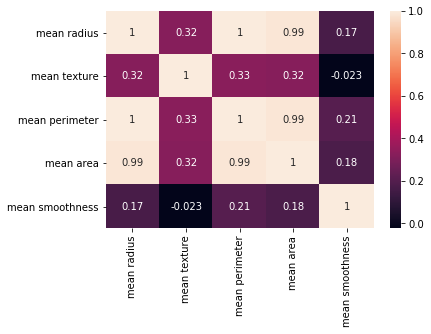

In [56]:
# mean radius и mean perimetor

cr = df5.corr()

sns.heatmap(cr, annot=True,
            xticklabels=cr.columns.values,
            yticklabels=cr.columns.values)

#### Проверить найденные пары t-тестом

In [61]:
# p-value < 0.05, гипотезу отвергаем, но это неверно, т.к. t-test не подходит для оценки зависимости разных параметров

stats.ttest_ind(df['mean perimeter'], df['mean radius'])

Ttest_indResult(statistic=75.62417662792113, pvalue=0.0)

#### Проверить руками гипотезу $H_0: M_{mean\ compactness} = 0$ 

In [60]:
# p-value < 0.05, поэтому гипотезу отвергаем

stats.ttest_1samp(df['mean compactness'],0)


Ttest_1sampResult(statistic=47.12726263249825, pvalue=2.0059202200488077e-198)

#### Нарисовать распределение признака worst texture с помощью
- диаграммы
- qq-plot
- эмпирическая ф.р.

In [ ]:
x = df['worst texture']

(array([0.00749454, 0.03747269, 0.05761426, 0.06136153, 0.04684086,
        0.03513065, 0.01311544, 0.0051525 , 0.00140523, 0.00093682]),
 array([12.02 , 15.772, 19.524, 23.276, 27.028, 30.78 , 34.532, 38.284,
        42.036, 45.788, 49.54 ]),
 <a list of 10 Patch objects>)

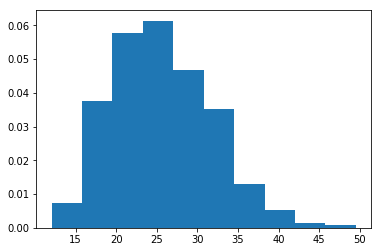

In [63]:
# диаграмма
plt.hist(x, density=True)

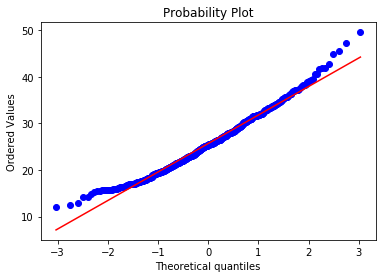

In [64]:
# qq-plot

res = stats.probplot(x, plot=plt)

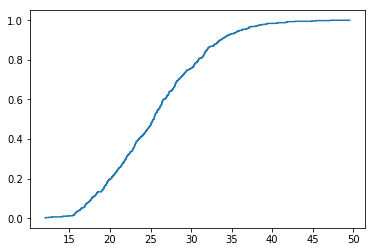

In [71]:
# эмпирическая ф.р.

ecdf = ECDF(x)
plt.step(ecdf.x, ecdf.y, label='ECDF')

### Вторая часть

Сгенерируйте выборку из пуассоновского распределения $Pois(\theta)$ для $\theta = 2$, записав
ее в виде матрицы ${\{X_{ij}\}}_{i=1...N, j=1...K}$ где $N= 1000$ и $K = 10000$.

Выполните следующую процедуру для всех $n=2, ...N$. Для всех $j = 1...K$ по выборке $\{X_{ij}\}_{i=1...n}$ оцените параметр $\theta$ с помощью оценки выборочного среднего $\hat{\theta_j^n}$ и оценки $\tilde{\theta}_j^n = \frac{1}{n-1} \sum_{i=1}^n\left(X_{ij} - \frac1n \sum_{i=1}^n X_{ij}\right)^2$. По выборкам $\{\hat{\theta}_j^n\}_{j=1...K}$ и $\{\tilde{\theta}_j^n\}_{j=1...K}$ для этих двух типов оценок найдите оценки дисперсий $\hat{\sigma}_n$ $\tilde{\sigma}_n$

Нарисуйте график оценок дисперсий в зависимости от $n$. При необходимости не забывайте выставлять значение plt.ylim. Сделайте выводы. **Постарайтесь решить эту задачу без циклов, используя только функции библиотеки numpy**

In [21]:
# или я что-то прослушала на лекциях, или там ничего подобного не было
# судя по всему, оценку θ̃ построена криво ...и непонятно, зачем это все.

poisson_rv = stats.poisson(mu = 2)

N = 1000
K = 10000

x = np.linspace(0,10,N*K)

arr = x.reshape(N,K)

#массив из средних значений для каждой строки для расчета выборочного среднего θnj^
arr_mean = np.mean(arr[:, 0:K], axis=1)

# оценка дисперии σ̂
print((arr_mean.var())**0.5)

Q = 1/(N-1)*sum((arr - 1/N*sum(arr))**2)

# оценка дисперии σ̃
print((Q.var())**0.5)

2.8867501912471147
1.140747539665364e-15


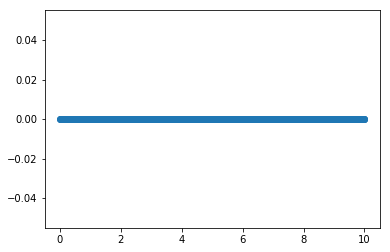

In [22]:
pmf1 = poisson_rv.pmf(arr_mean)
plt.plot(arr_mean, pmf1, 'o')

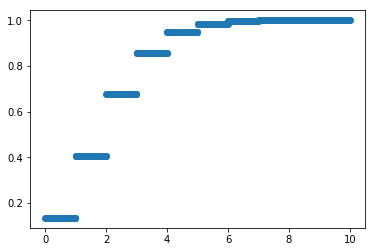

In [23]:
cdf1 = poisson_rv.cdf(arr_mean)
plt.plot(arr_mean, cdf1, 'o')

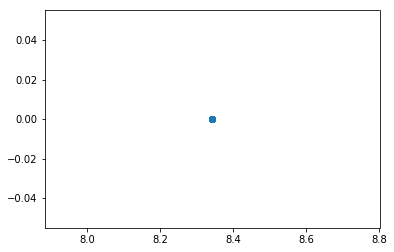

In [24]:
pmf2 = poisson_rv.pmf(Q)
plt.plot(Q, pmf2, 'o')

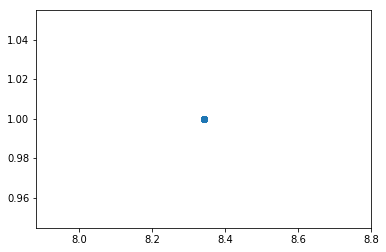

In [25]:
cdf2 = poisson_rv.cdf(Q)
plt.plot(Q, cdf2, 'o')